In [1]:
import numpy as np
import pandas as pd


In [2]:
# get seq
df=pd.read_table('seq.txt',names=['1','2','3','4','5','6','7'])
seq=np.array(df['6'])
df['8']=df['7']=='Strong'
label=np.array(df['8'].astype(int))

In [3]:
# 得到对应的feature
dff=np.array(pd.read_table('features.txt',names=['feature']))
a=dff.reshape(dff.shape[0],1)
features={}
for i in a: # i is ndarray(1,)
    str=i[0]
    features[str[:3]]=float(str[7:])
features


{'AAA': 0.006,
 'AAC': 0.005,
 'AAG': 0.01,
 'AAT': 0.003,
 'ACA': 0.006,
 'ACC': 0.022,
 'ACG': 0.004,
 'ACT': 0.004,
 'AGA': 0.016,
 'AGC': 0.025,
 'AGG': 0.034,
 'AGT': 0.011,
 'ATA': 0.002,
 'ATC': 0.01,
 'ATG': 0.014,
 'ATT': 0.005,
 'CAA': 0.008,
 'CAC': 0.02,
 'CAG': 0.04,
 'CAT': 0.012,
 'CCA': 0.033,
 'CCC': 0.057,
 'CCG': 0.009,
 'CCT': 0.043,
 'CGA': 0.004,
 'CGC': 0.01,
 'CGG': 0.01,
 'CGT': 0.001,
 'CTA': 0.007,
 'CTC': 0.03,
 'CTG': 0.036,
 'CTT': 0.013,
 'GAA': 0.007,
 'GAC': 0.008,
 'GAG': 0.034,
 'GAT': 0.01,
 'GCA': 0.028,
 'GCC': 0.036,
 'GCG': 0.006,
 'GCT': 0.023,
 'GGA': 0.024,
 'GGC': 0.033,
 'GGG': 0.034,
 'GGT': 0.018,
 'GTA': 0.005,
 'GTC': 0.013,
 'GTG': 0.02,
 'GTT': 0.004,
 'TAA': 0.002,
 'TAC': 0.003,
 'TAG': 0.003,
 'TAT': 0.005,
 'TCA': 0.012,
 'TCC': 0.028,
 'TCG': 0.006,
 'TCT': 0.016,
 'TGA': 0.015,
 'TGC': 0.024,
 'TGG': 0.03,
 'TGT': 0.012,
 'TTA': 0.0,
 'TTC': 0.009,
 'TTG': 0.013,
 'TTT': 0.009}

In [4]:
whole= []
for j in range(seq.shape[0]):
    s=seq[j]
    one=[]
    for i in range(27):
        index = i*3
        one.append(features[s[index:index+3].upper()])
    whole.append(one)
data=np.array(whole)

In [5]:
data
label

array([0, 0, 0, ..., 1, 0, 1])

### 决策树

0.4973821989528796

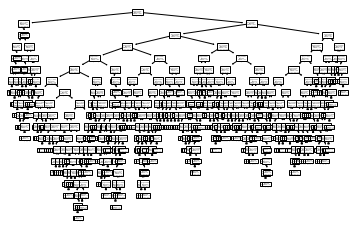

In [6]:
import sklearn.tree as tree
clftree=tree.DecisionTreeClassifier()
clftree=clftree.fit(data[:1800],label[:1800])
tree.plot_tree(clftree)
clftree.score(data[1800:],label[1800:])

KNN

In [7]:
from sklearn import neighbors
clfknn = neighbors.KNeighborsClassifier()
clfknn.fit(data[:1800],label[:1800])
clfknn.score(data[1800:],label[1800:])

0.612565445026178

线性SVM

In [8]:
from sklearn import svm
clfsvm=svm.SVC()
clfsvm.fit(data[:1800],label[:1800])
clfsvm.score(data[1800:],label[1800:])

0.6492146596858639